In [26]:
import pandas as pd
import numpy as np
import seaborn as sn
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns 
#Metrics:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import tree
from sklearn.feature_selection import RFE

#Imputer for missing values
from sklearn.impute import KNNImputer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import statistics


In [27]:
#searching for missing values and strategy to handle it
def Missing_Values_and_mean(name,data):
  i=0
  media=0
  tot=0
  for x in data:
    if(np.isnan(float(x))):
      i=i+1
    else:
      tot=tot+float(x)
  media=tot/(N-i)
  print("\n%s Analysis" %name)    
  print("Missing values: %d" %i)   
  print("Media: %f " %media)

def Missing_Values_and_mean_categoric(name,data):
    i=0
    k=0
    j=0
    media=0
    tot=0
    for x in data:
      if(np.isnan(float(x))):
        i=i+1
      elif(float(x)==1):
        j=j+1
      elif(float(x)==2):
        k=k+1    
    print("\n%s Analysis" %name)    
    print("Missing values: %d" %i)   
    print("Num 1: %d " %j)
    print("Num 2: %d" %k)

#searching for missing values and counting AL e SU ( nominal,0 1 2 3 4 5)
def Missing_Values_and_mean_AL_SU(name,data):
  n0=0
  n1=0
  n2=0
  n3=0
  n4=0
  n5=0
  for x in data:
    if(float(x)==0):
      n0=n0+1
    elif(float(x)==1):
      n1=n1+1
    elif(float(x)==2):
      n2=n2+1
    elif(float(x)==3):
      n3=n3+1
    elif(float(x)==4):
      n4=n4+1
    elif(float(x)==5):
      n5=n5+2
          
  print("\n%s Analysis" %name)    
  print("N0: %d"%n0)
  print("N1: %d"%n1)
  print("N2: %d"%n2)
  print("N3: %d"%n3)
  print("N4: %d"%n4)
  print("N5: %d"%n5)


def missing_values_for_each_row():
  k=0
  for ix in df.index:
      for y in df.loc[ix]:
        if(np.isnan(float(y))):
          k=k+1
      if(k>5):
        print(k)
      k=0

def calculateMean(name,data):
  i=0
  media=0
  tot=0
  for x in data:
    if(np.isnan(float(x))):
      i=i+1
    else:
      tot=tot+float(x)
  media=tot/(N-i) 
  print(media)
  return media

def calculateMostFrequent(name,data):
    i=0
    k=0
    j=0
    media=0
    tot=0
    for x in data:
      if(np.isnan(float(x))):
        i=i+1
      elif(float(x)==1):
        j=j+1
      elif(float(x)==2):
        k=k+1  
    if(j>k):
      print("For "+name+",most frequent: 1")
      return 1
    else:
      print("For "+name+",most frequent: 2")
      return 2 

def random_value_imputation(feature,data):
    random_sample = df_x_training[feature].dropna().sample(data[feature].isna().sum())
    print(random_sample)
    random_sample.index = data[data[feature].isnull()].index
    data.loc[data[feature].isnull(), feature] = random_sample



  


In [28]:
#load the dataset
df = pd.read_csv("my_dataset.csv", sep=';')
print("The dataset has %d rows and %d columns." % df.shape)
N=400
df.head()

The dataset has 400 rows and 25 columns.


,AGE,BP,SG,AL,SU,RBC,PC,PCC,BA,BGR,BU,SC,SOD,POT,HEMO,PCV,WBCC,RBCC,HTN,DM,CAD,APPET,PE,ANE,CLASS
0,48,80,1.020,1,0,?,normal,notpresent,notpresent,121,36,1.2,?,?,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,?,normal,notpresent,notpresent,?,18,0.8,?,?,11.3,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,53,1.8,?,?,9.6,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,26,1.4,?,?,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [29]:
#replace categorical value with number
df['RBC'] = df['RBC'].replace({'normal': '1'})
df['RBC'] = df['RBC'].replace({'abnormal': '2'})
df['PC'] = df['PC'].replace({'normal': '1'})
df['PC'] = df['PC'].replace({'abnormal': '2'})
df['PCC'] = df['PCC'].replace({'present': '1'})
df['PCC'] = df['PCC'].replace({'notpresent': '2'})
df['BA'] = df['BA'].replace({'present': '1'})
df['BA'] = df['BA'].replace({'notpresent': '2'})
df['HTN'] = df['HTN'].replace({'yes': '1'})
df['HTN'] = df['HTN'].replace({'no': '2'})
df['DM'] = df['DM'].replace({'yes': '1'})
df['DM'] = df['DM'].replace({'no': '2'})
df['CAD'] = df['CAD'].replace({'yes': '1'})
df['CAD'] = df['CAD'].replace({'no': '2'})
df['APPET'] = df['APPET'].replace({'good': '1'})
df['APPET'] = df['APPET'].replace({'poor': '2'})
df['PE'] = df['PE'].replace({'yes': '1'})
df['PE'] = df['PE'].replace({'no': '2'})
df['ANE'] = df['ANE'].replace({'yes': '1'})
df['ANE'] = df['ANE'].replace({'no': '2'})
df['CLASS'] = df['CLASS'].replace({'ckd': '1'})
df['CLASS'] = df['CLASS'].replace({'notckd': '0'})

df.head(15)

,AGE,BP,SG,AL,SU,RBC,PC,PCC,BA,BGR,BU,SC,SOD,POT,HEMO,PCV,WBCC,RBCC,HTN,DM,CAD,APPET,PE,ANE,CLASS
0,48,80,1.020,1,0,?,1,2,2,121,36,1.2,?,?,15.4,44,7800,5.2,1,1,2,1,2,2,1
1,7,50,1.020,4,0,?,1,2,2,?,18,0.8,?,?,11.3,38,6000,?,2,2,2,1,2,2,1
2,62,80,1.010,2,3,1,1,2,2,423,53,1.8,?,?,9.6,31,7500,?,2,1,2,2,2,1,1
3,48,70,1.005,4,0,1,2,1,2,117,56,3.8,111,2.5,11.2,32,6700,3.9,1,2,2,2,1,1,1
4,51,80,1.010,2,0,1,1,2,2,106,26,1.4,?,?,11.6,35,7300,4.6,2,2,2,1,2,2,1
5,60,90,1.015,3,0,?,?,2,2,74,25,1.1,142,3.2,12.2,39,7800,4.4,1,1,2,1,1,2,1
6,68,70,1.010,0,0,?,1,2,2,100,54,24.0,104,4.0,12.4,36,?,?,2,2,2,1,2,2,1
7,24,?,1.015,2,4,1,2,2,2,410,31,1.1,?,?,12.4,44,6900,5,2,1,2,1,1,2,1
8,52,100,1.015,3,0,1,2,1,2,138,60,1.9,?,?,10.8,33,9600,4.0,1,1,2,1,2,1,1
9,53,90,1.020,2,0,2,2,1,2,70,107,7.2,114,3.7,9.5,29,12100,3.7,1,1,2,2,2,1,1


In [30]:
#Replacing '?' with NaN

df['AGE'] = df['AGE'].replace({'?': np.nan})
df['BP'] = df['BP'].replace({'?': np.nan})
df['SG'] = df['SG'].replace({'?': np.nan})
df['AL'] = df['AL'].replace({'?': np.nan})
df['SU'] = df['SU'].replace({'?': np.nan})
df['BGR'] = df['BGR'].replace({'?': np.nan})
df['BU'] = df['BU'].replace({'?': np.nan})
df['SC'] = df['SC'].replace({'?': np.nan})
df['SOD'] = df['SOD'].replace({'?': np.nan})
df['POT'] = df['POT'].replace({'?': np.nan})
df['HEMO'] = df['HEMO'].replace({'?': np.nan})
df['PCV'] = df['PCV'].replace({'?': np.nan})
df['WBCC'] = df['WBCC'].replace({'?': np.nan})
df['RBCC'] = df['RBCC'].replace({'?': np.nan})
df['RBC'] = df['RBC'].replace({'?': np.nan})
df['PC'] = df['PC'].replace({'?': np.nan})
df['PCC'] = df['PCC'].replace({'?': np.nan})
df['BA'] = df['BA'].replace({'?': np.nan})
df['CAD'] = df['CAD'].replace({'?': np.nan})
df['HTN'] = df['HTN'].replace({'?': np.nan})
df['DM'] = df['DM'].replace({'?': np.nan})
df['APPET'] = df['APPET'].replace({'?': np.nan})
df['PE'] = df['PE'].replace({'?': np.nan})
df['ANE'] = df['ANE'].replace({'?': np.nan})

df.head(15)


,AGE,BP,SG,AL,SU,RBC,PC,PCC,BA,BGR,BU,SC,SOD,POT,HEMO,PCV,WBCC,RBCC,HTN,DM,CAD,APPET,PE,ANE,CLASS
0,48,80,1.020,1,0,NaN,1,2,2,121,36,1.2,NaN,NaN,15.4,44,7800,5.2,1,1,2,1,2,2,1
1,7,50,1.020,4,0,NaN,1,2,2,NaN,18,0.8,NaN,NaN,11.3,38,6000,NaN,2,2,2,1,2,2,1
2,62,80,1.010,2,3,1,1,2,2,423,53,1.8,NaN,NaN,9.6,31,7500,NaN,2,1,2,2,2,1,1
3,48,70,1.005,4,0,1,2,1,2,117,56,3.8,111,2.5,11.2,32,6700,3.9,1,2,2,2,1,1,1
4,51,80,1.010,2,0,1,1,2,2,106,26,1.4,NaN,NaN,11.6,35,7300,4.6,2,2,2,1,2,2,1
5,60,90,1.015,3,0,NaN,NaN,2,2,74,25,1.1,142,3.2,12.2,39,7800,4.4,1,1,2,1,1,2,1
6,68,70,1.010,0,0,NaN,1,2,2,100,54,24.0,104,4.0,12.4,36,NaN,NaN,2,2,2,1,2,2,1
7,24,NaN,1.015,2,4,1,2,2,2,410,31,1.1,NaN,NaN,12.4,44,6900,5,2,1,2,1,1,2,1
8,52,100,1.015,3,0,1,2,1,2,138,60,1.9,NaN,NaN,10.8,33,9600,4.0,1,1,2,1,2,1,1
9,53,90,1.020,2,0,2,2,1,2,70,107,7.2,114,3.7,9.5,29,12100,3.7,1,1,2,2,2,1,1


In [31]:
df.isnull().sum()

AGE        9
BP        12
SG        47
AL        46
SU        49
RBC      152
PC        65
PCC        4
BA         4
BGR       44
BU        19
SC        17
SOD       87
POT       88
HEMO      52
PCV       71
WBCC     106
RBCC     131
HTN        2
DM         2
CAD        2
APPET      1
PE         1
ANE        1
CLASS      0
dtype: int64

In [32]:
#Drop the feature with high percentage of missing values
df=df.drop('SOD' , axis=1)
df=df.drop('POT' , axis=1)
df=df.drop('WBCC' , axis=1)
df=df.drop('RBCC' , axis=1)
df=df.drop('RBC' , axis=1)

df.head(10)

,AGE,BP,SG,AL,SU,PC,PCC,BA,BGR,BU,SC,HEMO,PCV,HTN,DM,CAD,APPET,PE,ANE,CLASS
0,48,80,1.020,1,0,1,2,2,121,36,1.2,15.4,44,1,1,2,1,2,2,1
1,7,50,1.020,4,0,1,2,2,NaN,18,0.8,11.3,38,2,2,2,1,2,2,1
2,62,80,1.010,2,3,1,2,2,423,53,1.8,9.6,31,2,1,2,2,2,1,1
3,48,70,1.005,4,0,2,1,2,117,56,3.8,11.2,32,1,2,2,2,1,1,1
4,51,80,1.010,2,0,1,2,2,106,26,1.4,11.6,35,2,2,2,1,2,2,1
5,60,90,1.015,3,0,NaN,2,2,74,25,1.1,12.2,39,1,1,2,1,1,2,1
6,68,70,1.010,0,0,1,2,2,100,54,24.0,12.4,36,2,2,2,1,2,2,1
7,24,NaN,1.015,2,4,2,2,2,410,31,1.1,12.4,44,2,1,2,1,1,2,1
8,52,100,1.015,3,0,2,1,2,138,60,1.9,10.8,33,1,1,2,1,2,1,1
9,53,90,1.020,2,0,2,1,2,70,107,7.2,9.5,29,1,1,2,2,2,1,1


In [ ]:
BoxPlot = df['AGE'].dropna().astype(float)

plt.boxplot(BoxPlot)
plt.title('Box plot of AGE')

BoxPlot = df['HEMO'].dropna().astype(float)

plt.boxplot(BoxPlot)
plt.title('Box plot of HEMO')

BoxPlot = df['BGR'].dropna().astype(float)

plt.boxplot(BoxPlot)
plt.title('Box plot of BGR')

BoxPlot = df['BP'].dropna().astype(float)

plt.boxplot(BoxPlot)
plt.title('Box plot of BP')

BoxPlot = df['SC'].dropna().astype(float)

plt.boxplot(BoxPlot)
plt.title('Box plot of SC')

In [33]:
#ELIMINARE OUTLIERS

df_outliers = df[ df['BP'].astype(float) >= 140 ] # Step 1
df = df.drop(df_outliers.index, axis=0) # Step 2

df_outliers = df[ df['SC'].astype(float) >= 20 ] # Step 1
df = df.drop(df_outliers.index, axis=0) # Step 2

df_outliers = df[ df['HEMO'].astype(float) < 3.5 ] # Step 1
df = df.drop(df_outliers.index, axis=0) # Step 2

print(df)
N=393


    AGE  BP     SG AL SU PC PCC BA  BGR  ...  HEMO PCV HTN DM CAD APPET PE ANE CLASS
0    48  80  1.020  1  0  1   2  2  121  ...  15.4  44   1  1   2     1  2   2     1
1     7  50  1.020  4  0  1   2  2  NaN  ...  11.3  38   2  2   2     1  2   2     1
2    62  80  1.010  2  3  1   2  2  423  ...   9.6  31   2  1   2     2  2   1     1
3    48  70  1.005  4  0  2   1  2  117  ...  11.2  32   1  2   2     2  1   1     1
4    51  80  1.010  2  0  1   2  2  106  ...  11.6  35   2  2   2     1  2   2     1
..   ..  ..    ... .. .. ..  .. ..  ...  ...   ...  ..  .. ..  ..   ... ..  ..   ...
395  55  80  1.020  0  0  1   2  2  140  ...  15.7  47   2  2   2     1  2   2     0
396  42  70  1.025  0  0  1   2  2   75  ...  16.5  54   2  2   2     1  2   2     0
397  12  80  1.020  0  0  1   2  2  100  ...  15.8  49   2  2   2     1  2   2     0
398  17  60  1.025  0  0  1   2  2  114  ...  14.2  51   2  2   2     1  2   2     0
399  58  80  1.025  0  0  1   2  2  131  ...  15.8  53   2  2   2

In [ ]:
Missing_Values_and_mean("AGE",df['AGE'])
Missing_Values_and_mean("BP",df['BP'])
Missing_Values_and_mean("SG",df['SG'])
Missing_Values_and_mean_AL_SU("AL",df['AL'])
Missing_Values_and_mean_AL_SU("SU",df['SU'])
Missing_Values_and_mean("BGR",df['BGR'])
Missing_Values_and_mean("BU",df['BU'])
Missing_Values_and_mean("SC",df['SC'])
#Missing_Values_and_mean("SOD",df['SOD'])
#Missing_Values_and_mean("POT",df['POT'])
Missing_Values_and_mean("HEMO",df['HEMO'])
Missing_Values_and_mean("PCV",df['PCV'])
#Missing_Values_and_mean("WBCC",df['WBCC'])
#Missing_Values_and_mean("RBCC",df['RBCC'])

#Missing_Values_and_mean_categoric("RBC",df['RBC'])
Missing_Values_and_mean_categoric("PC",df['PC'])
Missing_Values_and_mean_categoric("PCC",df['PCC'])
Missing_Values_and_mean_categoric("BA",df['BA'])
Missing_Values_and_mean_categoric("HTN",df['HTN'])
Missing_Values_and_mean_categoric("DM",df['DM'])
Missing_Values_and_mean_categoric("CAD",df['CAD'])
Missing_Values_and_mean_categoric("APPET",df['APPET'])
Missing_Values_and_mean_categoric("PE",df['PE'])
Missing_Values_and_mean_categoric("ANE",df['ANE'])
Missing_Values_and_mean_categoric("CLASS",df['CLASS'])


AGE Analysis
Missing values: 9
Media: 51.483376 

BP Analysis
Missing values: 12
Media: 76.469072 

SG Analysis
Missing values: 47
Media: 1.017408 

AL Analysis
N0: 199
N1: 44
N2: 43
N3: 43
N4: 24
N5: 2

SU Analysis
N0: 290
N1: 13
N2: 18
N3: 14
N4: 13
N5: 6

BGR Analysis
Missing values: 44
Media: 148.036517 

BU Analysis
Missing values: 19
Media: 57.425722 

SC Analysis
Missing values: 17
Media: 3.072454 

HEMO Analysis
Missing values: 52
Media: 12.526437 

PCV Analysis
Missing values: 71
Media: 38.884498 

PC Analysis
Missing values: 65
Num 1: 259 
Num 2: 76

PCC Analysis
Missing values: 4
Num 1: 42 
Num 2: 354

BA Analysis
Missing values: 4
Num 1: 22 
Num 2: 374

HTN Analysis
Missing values: 2
Num 1: 147 
Num 2: 251

DM Analysis
Missing values: 2
Num 1: 137 
Num 2: 261

CAD Analysis
Missing values: 2
Num 1: 34 
Num 2: 364

APPET Analysis
Missing values: 1
Num 1: 317 
Num 2: 82

PE Analysis
Missing values: 1
Num 1: 76 
Num 2: 323

ANE Analysis
Missing values: 1
Num 1: 60 
Num 2: 339


In [8]:
df = shuffle(df)
df_y = df['CLASS'].astype(float)
df_x = df.drop(['CLASS'], axis=1).astype(float)
target_class=df_y
target_label_encoder = preprocessing.LabelEncoder()
target_class = target_label_encoder.fit_transform(target_class)
target_class1 = pd.DataFrame(target_class, columns=['CLASS'])
#split the dataset into training and testing data
df_x_training, df_x_test, df_y_training, df_y_test = train_test_split(df_x, target_class, 
                                                                                train_size = 0.7, test_size = 0.3)
print(df_x_training)
print(df_x_test)
print(df_y_training)
print(df_y_test)

      AGE    BP     SG   AL   SU   PC  ...  HTN   DM  CAD  APPET   PE  ANE
308  43.0  80.0  1.025  0.0  0.0  1.0  ...  2.0  2.0  2.0    1.0  2.0  2.0
174  54.0  70.0    NaN  NaN  NaN  NaN  ...  2.0  2.0  2.0    1.0  2.0  2.0
74   56.0  90.0  1.015  2.0  0.0  2.0  ...  1.0  2.0  2.0    1.0  2.0  2.0
167  34.0  70.0  1.020  0.0  0.0  1.0  ...  2.0  2.0  2.0    2.0  2.0  2.0
267  48.0  80.0  1.025  0.0  0.0  1.0  ...  2.0  2.0  2.0    1.0  2.0  2.0
..    ...   ...    ...  ...  ...  ...  ...  ...  ...  ...    ...  ...  ...
313  55.0  80.0  1.020  0.0  0.0  1.0  ...  2.0  2.0  2.0    1.0  2.0  2.0
348  38.0  80.0  1.020  0.0  0.0  1.0  ...  2.0  2.0  2.0    1.0  2.0  2.0
391  36.0  80.0  1.025  0.0  0.0  1.0  ...  2.0  2.0  2.0    1.0  2.0  2.0
53   62.0  80.0  1.015  0.0  5.0  NaN  ...  1.0  1.0  2.0    1.0  2.0  2.0
341  63.0  70.0  1.025  0.0  0.0  1.0  ...  2.0  2.0  2.0    1.0  2.0  2.0

[275 rows x 19 columns]
      AGE    BP     SG   AL   SU   PC  ...  HTN   DM  CAD  APPET   PE  ANE


Text(0.5, 1.0, 'Correlation Matrix')

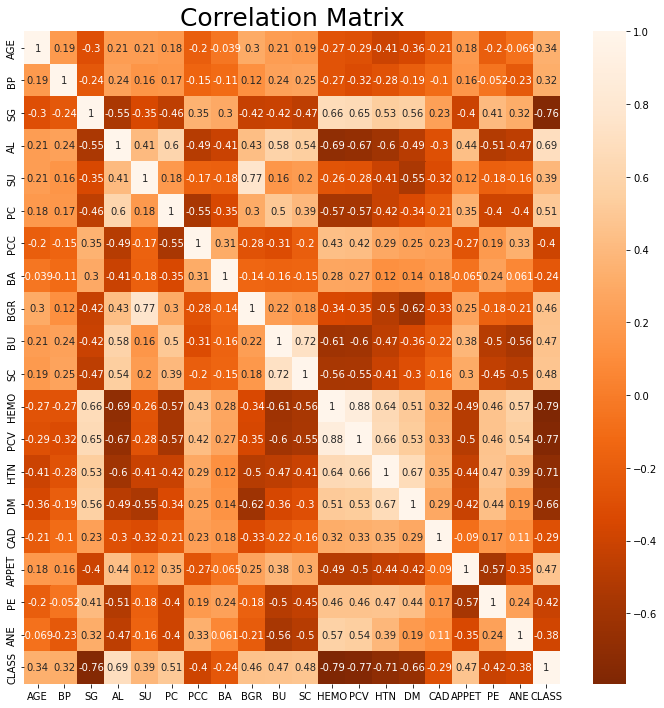

In [ ]:
#Correlation matrix 

dff = df.dropna().astype(float)
varcov = dff.corr()

plt.figure(figsize=(12,12))
sns.heatmap(varcov, annot=True, cmap="Oranges_r")
plt.title('Correlation Matrix', fontsize=25)

In [9]:
#From correlation matrix:
#PCV e HEMO are high correlated, drop PCV
#SC e BU are high correlated, drop BU
df_x_training=df_x_training.drop('PCV' , axis=1)
df_x_training=df_x_training.drop('BU' , axis=1)
df_x_test=df_x_test.drop('PCV' , axis=1)
df_x_test=df_x_test.drop('BU' , axis=1)
df=df.drop('PCV',axis=1)
df=df.drop('BU',axis=1)

In [ ]:
df.head(2)

,AGE,BP,SG,AL,SU,PC,PCC,BA,BGR,SC,HEMO,HTN,DM,CAD,APPET,PE,ANE,CLASS
0,48,80,1.020,1,0,1,2,2,121,1.2,15.4,1,1,2,1,2,2,1
1,7,50,1.020,4,0,1,2,2,NaN,0.8,11.3,2,2,2,1,2,2,1


In [35]:
import plotly.express as px

fig = px.scatter(df,x="AGE",y="HEMO", color="CLASS")
fig.show()

fig = px.scatter(df,x="AGE", color="CLASS")
fig.show()

In [36]:
import plotly.express as px

fig = px.bar(df, x="AL", color="CLASS")
fig.show()

fig = px.bar(df, x="HTN", color="CLASS")
fig.show()

In [ ]:
#replacement missing values nel training set


#AGE 
df_x_training['AGE'] = df_x_training['AGE'].replace({np.nan: int(calculateMean('AGE',df_x_training['AGE']))})


df_x_training['PCC'] = df_x_training['PCC'].replace({np.nan: calculateMostFrequent('PCC',df_x_training['PCC'])})
df_x_training['BA'] = df_x_training['BA'].replace({np.nan: calculateMostFrequent('BA',df_x_training['BA'])})
df_x_training['DM'] = df_x_training['DM'].replace({np.nan: calculateMostFrequent('DM',df_x_training['DM'])})
df_x_training['CAD'] = df_x_training['CAD'].replace({np.nan: calculateMostFrequent('CAD',df_x_training['CAD'])})
df_x_training['HDM'] = df_x_training['HTN'].replace({np.nan: calculateMostFrequent('HTN',df_x_training['HTN'])})
df_x_training['APPET'] = df_x_training['APPET'].replace({np.nan: calculateMostFrequent('APPET',df_x_training['APPET'])})
df_x_training['PE'] = df_x_training['PE'].replace({np.nan: calculateMostFrequent('PE',df_x_training['PE'])})
df_x_training['ANE'] = df_x_training['ANE'].replace({np.nan: calculateMostFrequent('ANE',df_x_training['ANE'])})


df_x_training.head(10)


In [ ]:
#replacement missing values nel test set 
#AGE - BP - SC
df_x_test['AGE'] = df_x_test['AGE'].replace({np.nan: int(calculateMean('AGE',df_x_training['AGE']))})



df_x_test['PCC'] = df_x_test['PCC'].replace({np.nan: calculateMostFrequent('PCC',df_x_training['PCC'])})
df_x_test['BA'] = df_x_test['BA'].replace({np.nan: calculateMostFrequent('BA',df_x_training['BA'])})
df_x_test['DM'] = df_x_test['DM'].replace({np.nan: calculateMostFrequent('DM',df_x_training['DM'])})
df_x_test['CAD'] = df_x_test['CAD'].replace({np.nan: calculateMostFrequent('CAD',df_x_training['CAD'])})
df_x_test['HDM'] = df_x_test['HTN'].replace({np.nan: calculateMostFrequent('HTN',df_x_training['HTN'])})
df_x_test['APPET'] = df_x_test['APPET'].replace({np.nan: calculateMostFrequent('APPET',df_x_training['APPET'])})
df_x_test['PE'] = df_x_test['PE'].replace({np.nan: calculateMostFrequent('PE',df_x_training['PE'])})
df_x_test['ANE'] = df_x_test['ANE'].replace({np.nan: calculateMostFrequent('ANE',df_x_training['ANE'])})


df_x_test.head(10)


In [ ]:
df_x_training.isnull().sum()


In [ ]:
# Approach 1 : Substitution of missing values with random sampling imputation

random_value_imputation("BP",df_x_training)
random_value_imputation("SC",df_x_training)

random_value_imputation("SG",df_x_training)
random_value_imputation("AL",df_x_training)
random_value_imputation("SU",df_x_training)
random_value_imputation("BGR",df_x_training)
random_value_imputation("HEMO",df_x_training)
random_value_imputation("HTN",df_x_training)
random_value_imputation("PC",df_x_training)

##

random_value_imputation("BP",df_x_test)
random_value_imputation("SC",df_x_test)

random_value_imputation("SG",df_x_test)
random_value_imputation("AL",df_x_test)
random_value_imputation("SU",df_x_test)
random_value_imputation("BGR",df_x_test)
random_value_imputation("HEMO",df_x_test)
random_value_imputation("HTN",df_x_test)
random_value_imputation("PC",df_x_test)



In [ ]:
#Approach 2: Substitution of missing values with KNNImputer

print('\nAre there missing values in the Features? \n' + str(df_x_training.isna().any()))
knn_missing_values_imputer = KNNImputer(n_neighbors=5)
df_x_training = pd.DataFrame(knn_missing_values_imputer.fit_transform(df_x_training),columns = df_x_training.columns)
print('\nNow, Are there any missing values in Features? ' + str(df_x_training.isna().any()))

df_x_training.head(40)

##

print('\nAre there missing values in the Features? \n' + str(df_x_test.isna().any()))
knn_missing_values_imputer = KNNImputer(n_neighbors=5)
df_x_test = pd.DataFrame(knn_missing_values_imputer.fit_transform(df_x_test),columns = df_x_test.columns)
print('\nNow, Are there any missing values in Features? ' + str(df_x_test.isna().any()))

df_x_test.head(40)

In [ ]:
#Normalization of training set
df_x_training_normalized = StandardScaler().fit_transform(df_x_training) # normalizing the features
print(df_x_training_normalized)

[[ 0.63489503  0.2600079  -1.38179285 ...  0.47756693 -2.52357307
   0.72804852]
 [ 0.51786369 -0.46801423  0.38488294 ...  0.47756693  0.39626354
   0.72804852]
 [-2.64198256 -1.19603636 -1.38179285 ...  0.47756693  0.39626354
   0.72804852]
 ...
 [-0.12580869  0.2600079   0.38488294 ...  0.47756693  0.39626354
   0.72804852]
 [-1.1205751   0.98803004  1.26822084 ... -2.09394732 -2.52357307
  -1.37353483]
 [ 0.45934802  1.71605217 -1.38179285 ...  0.47756693 -2.52357307
  -1.37353483]]


In [ ]:
df_x_test.isnull().sum()

AGE      0
BP       0
SG       0
AL       0
SU       0
PC       0
PCC      0
BA       0
BGR      0
SC       0
HEMO     0
HTN      0
DM       0
CAD      0
APPET    0
PE       0
ANE      0
HDM      0
dtype: int64

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


The best parameters are:
 {'C': 10}
0.9576271186440678
0.9701492537313433
0.9558823529411765
0.962962962962963
Confusion matrix:



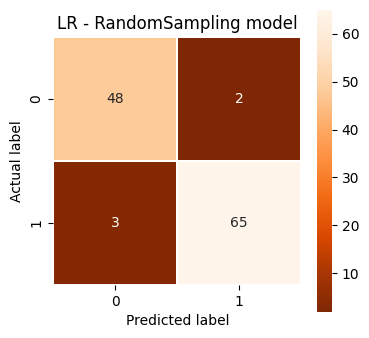

In [15]:
my_logi = LogisticRegression().fit(df_x_training, df_y_training)
my_logi_predict_test = my_logi.predict(df_x_test)

my_logi = LogisticRegression()

parameters_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

#apply gridsearch to find the optimal solution
logi_grid_search = GridSearchCV(my_logi, parameters_grid, scoring = 'accuracy')
#fit the data to the grid
logi_grid_search.fit(df_x_training, df_y_training)

#print which are best parameters after gridsearch
print('The best parameters are:\n ' +str(logi_grid_search.best_params_))

#svm predictions on test features
logi_prediction = logi_grid_search.predict(df_x_test)
my_logi.fit(df_x_training,df_y_training)
my_logi_predict_test = my_logi.predict(df_x_test)


logi_acc = accuracy_score(my_logi_predict_test, df_y_test)
logi_preci = precision_score(my_logi_predict_test, df_y_test)
logi_recall = recall_score(my_logi_predict_test, df_y_test)
logi_f1 = f1_score(my_logi_predict_test, df_y_test)

print(logi_acc)
print(logi_preci)
print(logi_recall)
print(logi_f1)

print("Confusion matrix:\n")
cm=confusion_matrix(my_logi_predict_test,df_y_test)

plt.rcParams['figure.dpi'] = 100
plt.figure(figsize=(4,4))
sn.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Oranges_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("LR - RandomSampling model")
plt.show()



The best parameters are:
 {'n_neighbors': 1}
0.8305084745762712
0.7611940298507462
0.9272727272727272
0.8360655737704917
Confusion matrix:



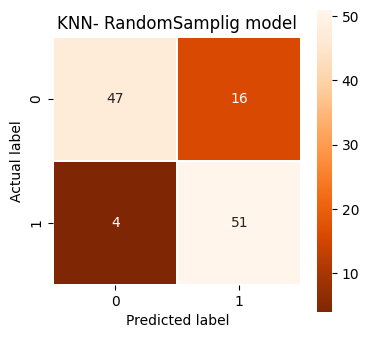

In [16]:
my_neigh = KNeighborsClassifier(n_neighbors=2).fit(df_x_training,df_y_training)

parameters_grid ={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

#apply gridsearch to find the optimal solution
knn_grid_search = GridSearchCV(my_neigh, parameters_grid, scoring = 'accuracy')
#fit the data to the grid
knn_grid_search.fit(df_x_training, df_y_training)

#print which are best parameters after gridsearch
print('The best parameters are:\n ' +str(knn_grid_search.best_params_))

knn_prediction = knn_grid_search.predict(df_x_test)
my_neigh_predict = my_neigh.predict(df_x_test)

#metrics:
neigh_acc = accuracy_score(my_neigh_predict, df_y_test)
neigh_preci = precision_score(my_neigh_predict, df_y_test)
neigh_recall = recall_score(my_neigh_predict, df_y_test)
neigh_f1 = f1_score(my_neigh_predict, df_y_test)
print(neigh_acc)
print(neigh_preci)
print(neigh_recall)
print(neigh_f1)

print("Confusion matrix:\n")
cm=confusion_matrix(my_neigh_predict,df_y_test)

plt.rcParams['figure.dpi'] = 100
plt.figure(figsize=(4,4))
sn.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Oranges_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("KNN- RandomSamplig model")

plt.show()


The best parameters are:
 {'C': 1, 'kernel': 'linear'}
0.7288135593220338
0.7611940298507462
0.7611940298507462
0.7611940298507462
Confusion matrix:



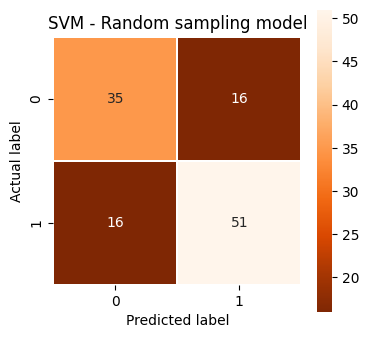

In [17]:
my_svm = svm.SVC()

#defining the svc parameters for grid search
parameters_grid = {'kernel': ['poly', 'rbf', 'linear', 'sigmoid'], 
                   'C': [0.1, 1, 10, 100, 1000]}

svm_grid_search = GridSearchCV(my_svm, parameters_grid, scoring = 'accuracy')
#fit the data to the grid
svm_grid_search.fit(df_x_training, df_y_training)

#print which are best parameters after gridsearch
print('The best parameters are:\n ' +str(svm_grid_search.best_params_))


#svm predictions on test features
svm_prediction = svm_grid_search.predict(df_x_test)
my_svm.fit(df_x_training,df_y_training)
my_svm_predict = my_svm.predict(df_x_test)

#metrics:
svm_acc = accuracy_score(my_svm_predict, df_y_test)
svm_preci = precision_score(my_svm_predict, df_y_test)
svm_recall = recall_score(my_svm_predict, df_y_test)
svm_f1 = f1_score(my_svm_predict, df_y_test)

print(svm_acc)
print(svm_preci)
print(svm_recall)
print(svm_f1)

print("Confusion matrix:\n")
cm=confusion_matrix(my_svm_predict,df_y_test)

plt.rcParams['figure.dpi'] = 100
plt.figure(figsize=(4,4))
sn.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Oranges_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("SVM - Random sampling model")
plt.show()


The best parameters are:
 {'max_depth': 4, 'min_samples_split': 4}
0.9576271186440678
1.0
0.9305555555555556
0.9640287769784173
Confusion matrix:



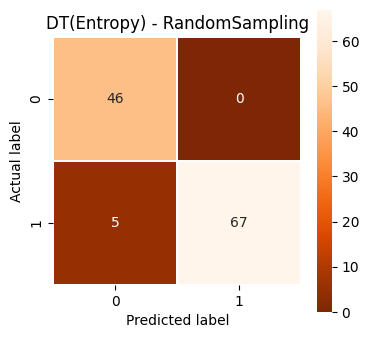

In [18]:
my_tree = tree.DecisionTreeClassifier(criterion='entropy')

parameters_grid = {'max_depth': [1,2,3,4,5,6,7] ,
                   'min_samples_split': [2, 3, 4]}

#apply gridsearch to find the optimal solution
tree_grid_search = GridSearchCV(my_tree, parameters_grid, scoring = 'accuracy')
#fit the data to the grid
tree_grid_search.fit(df_x_training, df_y_training)

#print which are best parameters after gridsearch
print('The best parameters are:\n ' +str(tree_grid_search.best_params_))

tree_prediction = tree_grid_search.predict(df_x_test)

my_tree.fit(df_x_training,df_y_training)
my_tree_predict = my_tree.predict(df_x_test)

#metrics:
tree_acc = accuracy_score(my_tree_predict, df_y_test)
tree_preci = precision_score(my_tree_predict, df_y_test)
tree_recall = recall_score(my_tree_predict, df_y_test)
tree_f1 = f1_score(my_tree_predict, df_y_test)

print(tree_acc)
print(tree_preci)
print(tree_recall)
print(tree_f1)

print("Confusion matrix:\n")
cm=confusion_matrix(my_tree_predict,df_y_test)

plt.rcParams['figure.dpi'] = 100
plt.figure(figsize=(4,4))
sn.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Oranges_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("DT(Entropy) - RandomSampling")
plt.show()


The best parameters are:
 {'max_depth': 3, 'min_samples_split': 2}
0.9576271186440678
1.0
0.9305555555555556
0.9640287769784173
Confusion matrix:



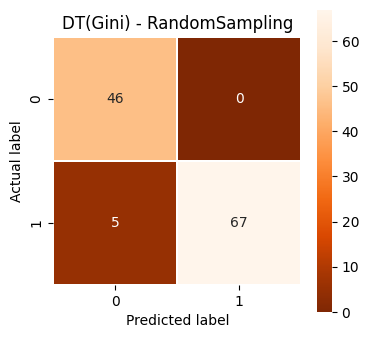

In [20]:
my_tree = tree.DecisionTreeClassifier(criterion='gini')

parameters_grid = {'max_depth': [1,2,3,4,5,6,7] ,
                   'min_samples_split': [2, 3, 4]}

#apply gridsearch to find the optimal solution
tree_grid_search = GridSearchCV(my_tree, parameters_grid, scoring = 'accuracy')
#fit the data to the grid
tree_grid_search.fit(df_x_training, df_y_training)

#print which are best parameters after gridsearch
print('The best parameters are:\n ' +str(tree_grid_search.best_params_))

#svm predictions on test features
tree_prediction = tree_grid_search.predict(df_x_test)
my_tree.fit(df_x_training,df_y_training)
my_tree_predict = my_tree.predict(df_x_test)

#metrics:
tree_acc = accuracy_score(my_tree_predict, df_y_test)
tree_preci = precision_score(my_tree_predict, df_y_test)
tree_recall = recall_score(my_tree_predict, df_y_test)
tree_f1 = f1_score(my_tree_predict, df_y_test)

print(tree_acc)
print(tree_preci)
print(tree_recall)
print(tree_f1)


print("Confusion matrix:\n")
cm=confusion_matrix(my_tree_predict,df_y_test)

plt.rcParams['figure.dpi'] = 100
plt.figure(figsize=(4,4))
sn.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Oranges_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("DT(Gini) - RandomSampling")
plt.show()


The best parameters are:
 {'max_depth': 3, 'max_features': 10, 'n_estimators': 7}
0.9491525423728814
1.0
0.9178082191780822
0.9571428571428571
Confusion matrix:



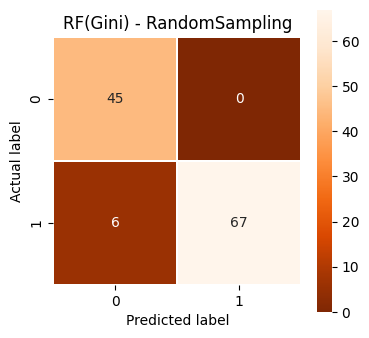

In [21]:
my_forest = RandomForestClassifier(criterion='gini')

parameters_grid = {'n_estimators': [1,2,3,4,5,6,7,8],
                   'max_features': [1,2,3,4,5,10],
                   'max_depth' : [1,2,3,4,5,6,7,10],}

#apply gridsearch to find the optimal solution
forest_grid_search = GridSearchCV(my_forest, parameters_grid, scoring = 'accuracy')
#fit the data to the grid
forest_grid_search.fit(df_x_training, df_y_training)

#print which are best parameters after gridsearch
print('The best parameters are:\n ' +str(forest_grid_search.best_params_))


#svm predictions on test features
forest_prediction = forest_grid_search.predict(df_x_test)
my_forest.fit(df_x_training,df_y_training)
my_forest_predict = my_forest.predict(df_x_test)

#metrics:
forest_acc = accuracy_score(my_forest_predict, df_y_test)
forest_preci = precision_score(my_forest_predict, df_y_test)
forest_recall = recall_score(my_forest_predict, df_y_test)
forest_f1 = f1_score(my_forest_predict, df_y_test)

print(forest_acc)
print(forest_preci)
print(forest_recall)
print(forest_f1)


print("Confusion matrix:\n")
cm=confusion_matrix(my_forest_predict,df_y_test)

plt.rcParams['figure.dpi'] = 100
plt.figure(figsize=(4,4))
sn.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Oranges_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("RF(Gini) - RandomSampling")
plt.show()




The best parameters are:
 {'max_depth': 6, 'max_features': 4, 'n_estimators': 8}

The best model after gridsearch is:
 RandomForestClassifier(criterion='entropy', max_depth=6, max_features=4,
                       n_estimators=8)
0.9491525423728814
1.0
0.9178082191780822
0.9571428571428571
Confusion matrix:



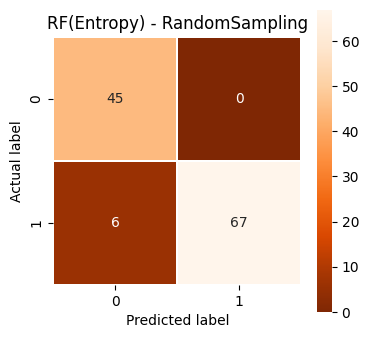

In [22]:
my_forest = RandomForestClassifier(criterion='entropy')

parameters_grid = {'n_estimators': [1,2,3,4,5,6,7,8],
                   'max_features': [1,2,3,4,5,10],
                   'max_depth' : [1,2,3,4,5,6,7,10],}

#apply gridsearch to find the optimal solution
forest_grid_search = GridSearchCV(my_forest, parameters_grid, scoring = 'accuracy')
#fit the data to the grid
forest_grid_search.fit(df_x_training, df_y_training)

#print which are best parameters after gridsearch
print('The best parameters are:\n ' +str(forest_grid_search.best_params_))

#print the best model after gridsearch
print('\nThe best model after gridsearch is:\n ' + str(forest_grid_search.best_estimator_))

#svm predictions on test features
forest_prediction = forest_grid_search.predict(df_x_test)
my_forest.fit(df_x_training,df_y_training)
my_forest_predict = my_forest.predict(df_x_test)

#metrics:
forest_acc = accuracy_score(my_forest_predict, df_y_test)
forest_preci = precision_score(my_forest_predict, df_y_test)
forest_recall = recall_score(my_forest_predict, df_y_test)
forest_f1 = f1_score(my_forest_predict, df_y_test)

print(forest_acc)
print(forest_preci)
print(forest_recall)
print(forest_f1)

print("Confusion matrix:\n")
cm=confusion_matrix(my_forest_predict,df_y_test)

plt.rcParams['figure.dpi'] = 100
plt.figure(figsize=(4,4))
sn.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Oranges_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("RF(Entropy) - RandomSampling")
plt.show()
